In [671]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [672]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [673]:
for column in train.columns:
    print(column, len(train[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


so the columns "passangerId", "Name", "Ticket" need to be droped

In [674]:
drop_columns = ["PassengerId", "Name", "Ticket"]

for c in drop_columns :
    train = train.drop(c, axis=1)
    test = test.drop(c, axis=1)

In [675]:
for column in train.columns:
    print(column, (train[column].unique()))

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
Age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.

In [676]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [677]:
for column in train.columns:
    print(column, train[column].isnull().sum())

Survived 0
Pclass 0
Sex 0
Age 177
SibSp 0
Parch 0
Fare 0
Cabin 687
Embarked 2


cabin column need to be droped and embarked rows should be removed and age null values should be filled

In [678]:
train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

In [679]:
train = train.dropna(subset=['Embarked'])

In [680]:
for column in train.columns:
    print(column, train[column].isnull().sum())

Survived 0
Pclass 0
Sex 0
Age 177
SibSp 0
Parch 0
Fare 0
Embarked 0


In [681]:
for column in test.columns:
    print(column, test[column].isnull().sum())

Pclass 0
Sex 0
Age 86
SibSp 0
Parch 0
Fare 1
Embarked 0


In [682]:
test_label = pd.read_csv('gender_submission.csv')

In [683]:
missing_fare_indices = test[test['Fare'].isnull()].index

test = test.drop(missing_fare_indices)
test_label = test_label.drop(missing_fare_indices)

filling age column

In [684]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


20% of age is missing value

predict missing vlaues of age

In [685]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

In [686]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

features = ['Pclass', 'Fare', 'SibSp', 'Parch', 'Sex', 'Embarked']

train_known_age = train[train['Age'].notnull()]
reg = LinearRegression()
reg.fit(train_known_age[features], train_known_age['Age'])

# Predict missing Age in train set
train_missing_age = train[train['Age'].isnull()]
predicted_train_ages = reg.predict(train_missing_age[features])
predicted_train_ages = np.clip(predicted_train_ages, a_min=0, a_max=None)
train.loc[train['Age'].isnull(), 'Age'] = predicted_train_ages

# Predict missing Age in test set
test_missing_age = test[test['Age'].isnull()]
predicted_test_ages = reg.predict(test_missing_age[features])
predicted_test_ages = np.clip(predicted_test_ages, a_min=0, a_max=None)
test.loc[test['Age'].isnull(), 'Age'] = predicted_test_ages


normalization

In [687]:
# from sklearn.preprocessing import StandardScaler

# scaler_age = StandardScaler()
# train["Age"] = scaler_age.fit_transform(train[["Age"]])
# test["Age"] = scaler_age.transform(test[["Age"]])

# scaler_fare = StandardScaler()
# train["Fare"] = scaler_fare.fit_transform(train[["Fare"]])
# test["Fare"] = scaler_fare.transform(test[["Fare"]])


In [688]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [689]:
X_train = train.drop(columns=["Survived"])
y_train = train["Survived"]

In [690]:
# import pandas as pd

X_all = pd.concat([X_train, test], axis=0,).reset_index(drop=True)
X_all = X_all.sample(frac=1, random_state=42).reset_index(drop=True)
y_all = pd.concat([y_train, test_label["Survived"]], axis=0).reset_index(drop=True)
y_all = y_all.sample(frac=1, random_state=42).reset_index(drop=True)


In [691]:
X_val, X_test, y_val, y_test = train_test_split(test, test_label["Survived"], test_size=0.5, random_state=42, shuffle=True)

In [692]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2



--- Decision Tree ---
Accuracy: 0.9567
train accuracy : Accuracy: 0.8223
Precision: 0.9157
train accuracy : Precision: 0.8054
Recall: 0.9744
train accuracy : Recall: 0.7059
F1: 0.9441
train accuracy : F1: 0.7524


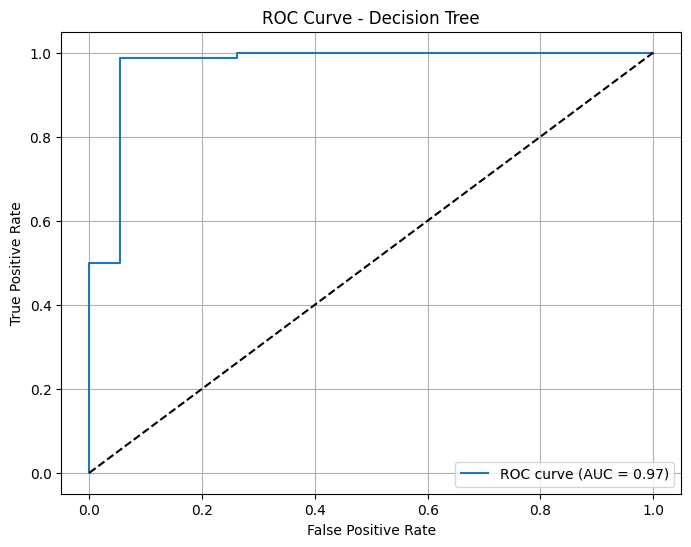


--- Naive Bayes ---
Accuracy: 0.8990
train accuracy : Accuracy: 0.7919
Precision: 0.8132
train accuracy : Precision: 0.7286
Recall: 0.9487
train accuracy : Recall: 0.7265
F1: 0.8757
train accuracy : F1: 0.7275


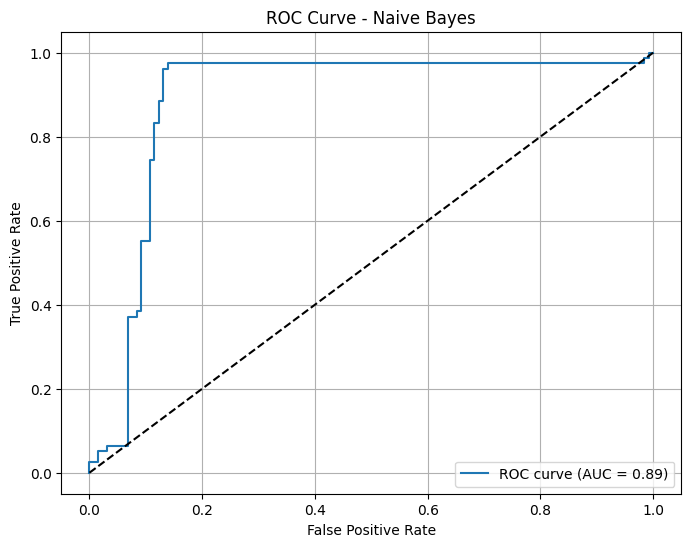


--- Logistic Regression ---
Accuracy: 0.9423
train accuracy : Accuracy: 0.8099
Precision: 0.9342
train accuracy : Precision: 0.7767
Recall: 0.9103
train accuracy : Recall: 0.7059
F1: 0.9221
train accuracy : F1: 0.7396


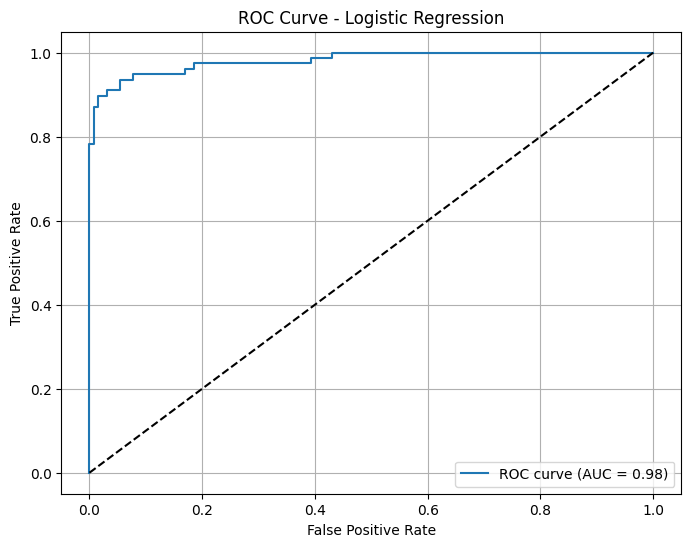


--- k-NN ---
Accuracy: 0.6250
train accuracy : Accuracy: 0.7402
Precision: 0.5000
train accuracy : Precision: 0.6940
Recall: 0.4359
train accuracy : Recall: 0.5735
F1: 0.4658
train accuracy : F1: 0.6280


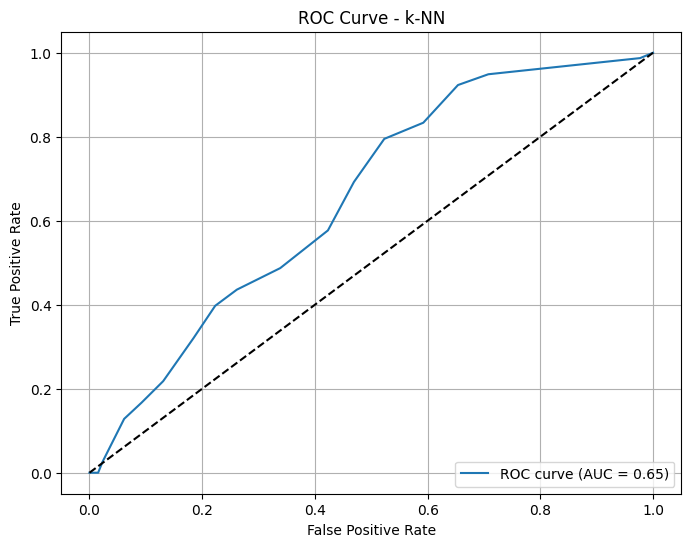

In [693]:
import matplotlib.pyplot as plt
classifiers = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=10),
    'k-NN': KNeighborsClassifier(n_neighbors=17)
}

scoring = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score
}

for name, clf in classifiers.items():
    print(f"\n--- {name} ---")
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    y_pred_train = clf.predict(X_train)
    
    for metric_name, metric_func in scoring.items():
        score = metric_func(y_val, y_pred)
        print(f"{metric_name.capitalize()}: {score:.4f}")
        score = metric_func(y_train, y_pred_train)
        print(f"train accuracy : {metric_name.capitalize()}: {score:.4f}")

    if hasattr(clf, 'predict_proba'):
        y_proba = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping ROC plot for {name}: predict_proba not available")

# تحلیل

decision tree و regression

دقت بالا

recall نزدیک به 1 که نشون میده اکثر نمونه های مثبت رو درست تشخیص داده

precision نزدیک به 1 که مشون میده اکثر نمونه های منفی درست تشخیص داده شدند اما نتیجه مدل روی نمونه های مثبت بهتر بوده

 اعداد نزدیک به هم که خوبه و نشون دهنده شانسی نبودن نتیجه است precision و recall

AUC نزدیک به 1 است که نتیجه بالا رو بهتر نشون میده

F1 نزدیک به 1 که نشون میده بین نتایج مثبت و منفی تعادل وجود داره

naive bais

دقت پایین تر از مدل های قبلی که دلیلش با توجه به مفدر ریکال و پرسیژن این هست که مدل روی نمونه های مثبت عملکرد بهتری داشته و بیشتر پیشبینیش به سمت مثبت بوده

بقیه چیزها مثله قبل

knn

دقت بسیار پایین

نه روی مدل های مثبت و نه روی نمونه های منفی پنان دقت خوبی نداشته و تقریبا داره شانسی عمل میکنه با توجه به پایین بودن مقدار AUC


Decision Tree


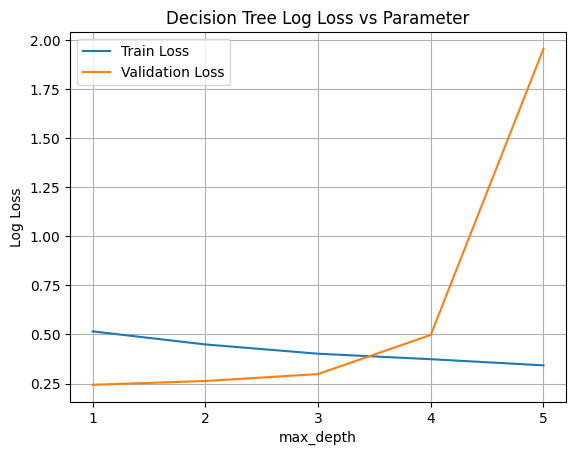


Naive Bayes


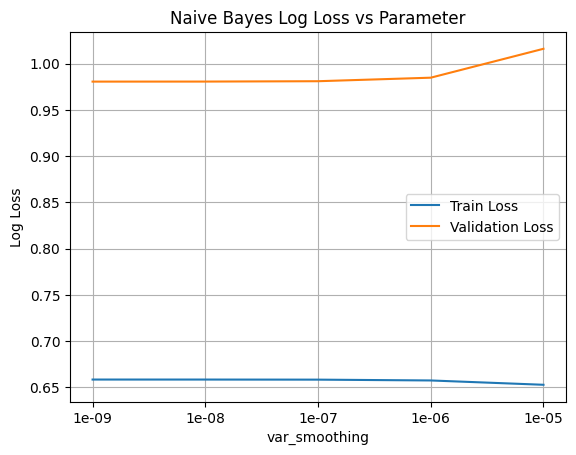


Logistic Regression


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

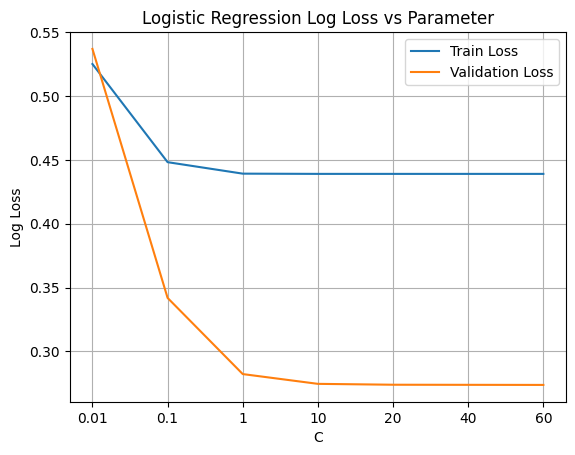


k-NN


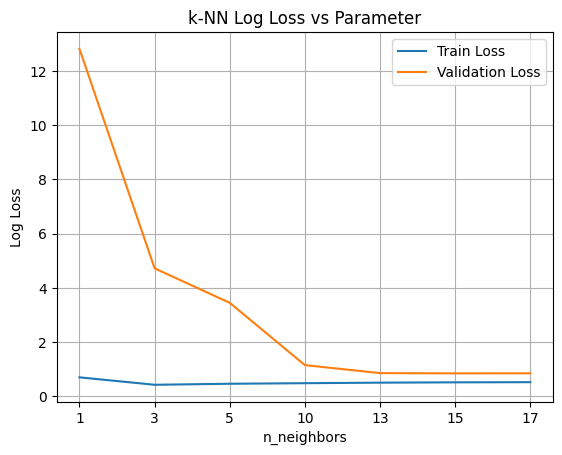

In [694]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

param_grids = {
    'Decision Tree': {
        'model': DecisionTreeClassifier,
        'params': {'max_depth': [1, 2, 3, 4, 5]}
    },
    'Naive Bayes': {
        'model': GaussianNB,
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }  
    },
    'Logistic Regression': {
        'model': LogisticRegression,
        'params': {'C': [0.01, 0.1, 1, 10, 20, 40, 60], 'max_iter': [1000]}  
    },
    'k-NN': {
        'model': KNeighborsClassifier,
        'params': {'n_neighbors': [1, 3, 5, 10, 13, 15, 17]}
    }
}

for name, clf_info in param_grids.items():
    model_class = clf_info['model']
    param_grid = clf_info['params']
    
    print(f"\n{name}")
    
    train_losses = []
    val_losses = []
    param_labels = []
    
    if not param_grid:
        clf = model_class()
        clf.fit(X_train, y_train)
        y_train_prob = clf.predict_proba(X_train)
        y_val_prob = clf.predict_proba(X_val)
        train_losses.append(log_loss(y_train, y_train_prob))
        val_losses.append(log_loss(y_val, y_val_prob))
        param_labels.append('default')
    else:
        for param_value in list(param_grid.values())[0]:
            params = {list(param_grid.keys())[0]: param_value}
            clf = model_class(**params)
            clf.fit(X_train, y_train)
            y_train_prob = clf.predict_proba(X_train)
            y_val_prob = clf.predict_proba(X_val)
            train_losses.append(log_loss(y_train, y_train_prob))
            val_losses.append(log_loss(y_val, y_val_prob))
            param_labels.append(str(param_value))
    
    plt.figure()
    plt.plot(param_labels, train_losses, label='Train Loss')
    plt.plot(param_labels, val_losses, label='Validation Loss')
    plt.xlabel(list(param_grid.keys())[0] if param_grid else 'Parameter')
    plt.ylabel('Log Loss')
    plt.title(f'{name} Log Loss vs Parameter')
    plt.legend()
    plt.grid(True)
    plt.show()


so the best depth for decsition tree is 3

the best k for knn is 13

the best C for logistic regression is 10

and naive bais is always bad

In [695]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=10),
    'k-NN': KNeighborsClassifier(n_neighbors=13)
}

for name, clf in classifiers.items(): 
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else y_pred_test

    acc = accuracy_score(y_test, y_pred_test)
    print(f"{name} acc : {acc:.4f}")

Decision Tree acc : 0.9569
Naive Bayes acc : 0.8995
Logistic Regression acc : 0.9282
k-NN acc : 0.6699


cross validiation method


--- Decision Tree ---
Accuracy: 0.8675
Mean train accuracy: 0.8736
Precision: 0.8553
Mean train precision: 0.8617
Recall: 0.7805
Mean train recall: 0.7915
F1: 0.8158
Mean train f1: 0.8251
Roc_auc: 0.8984
Mean train roc_auc: 0.9043


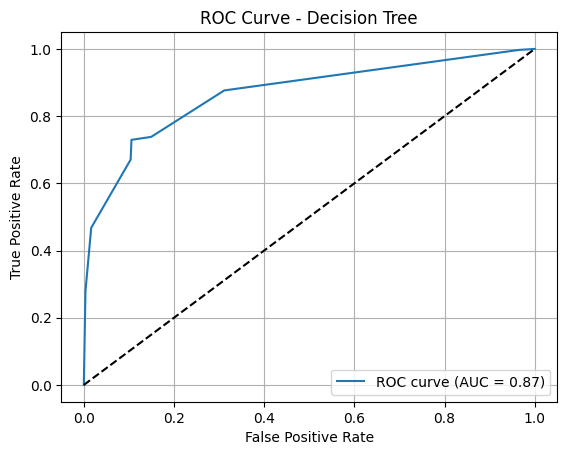


--- Naive Bayes ---
Accuracy: 0.8415
Mean train accuracy: 0.8438
Precision: 0.7928
Mean train precision: 0.7955
Recall: 0.7846
Mean train recall: 0.7880
F1: 0.7886
Mean train f1: 0.7917
Roc_auc: 0.8716
Mean train roc_auc: 0.8735


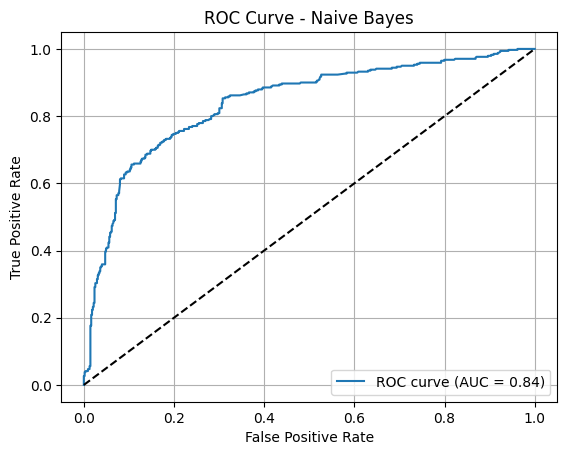


--- Logistic Regression ---
Accuracy: 0.8537
Mean train accuracy: 0.8562
Precision: 0.8288
Mean train precision: 0.8330
Recall: 0.7724
Mean train recall: 0.7732
F1: 0.7993
Mean train f1: 0.8020
Roc_auc: 0.8954
Mean train roc_auc: 0.8977


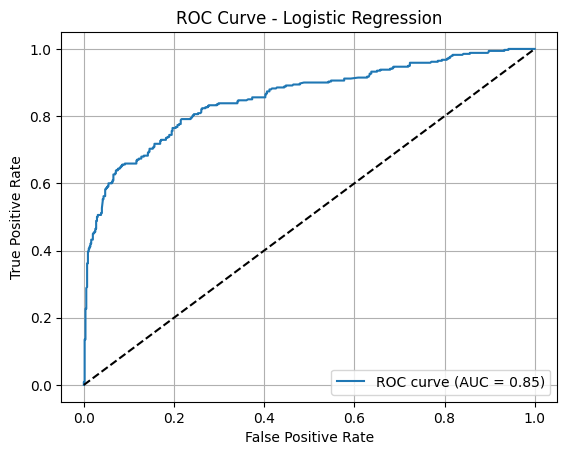


--- k-NN ---
Accuracy: 0.6983
Mean train accuracy: 0.7380
Precision: 0.6265
Mean train precision: 0.6856
Recall: 0.5023
Mean train recall: 0.5630
F1: 0.5555
Mean train f1: 0.6181
Roc_auc: 0.7499
Mean train roc_auc: 0.8084


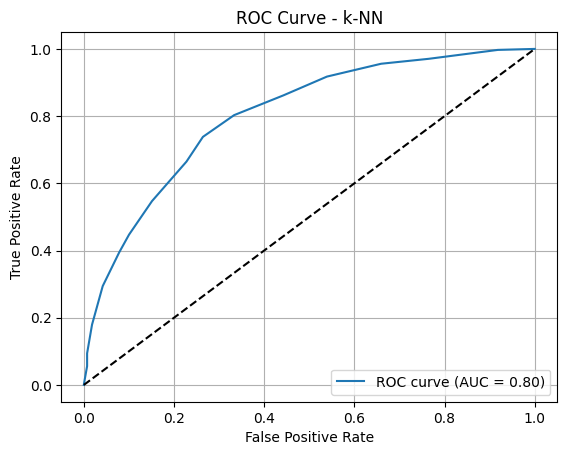

In [ ]:
from sklearn.model_selection import cross_validate
classifiers = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1),
    'k-NN': KNeighborsClassifier(n_neighbors=17)
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

for name, clf in classifiers.items():
    print(f"\n--- {name} ---")
    
    cv_results = cross_validate(clf, X_all, y_all, cv=8, scoring=scoring, return_estimator=True, return_train_score=True)

    for metric in scoring:
        mean_score = np.mean(cv_results[f'test_{metric}'])
        print(f"{metric.capitalize()}: {mean_score:.4f}")
        # mean_train_score = np.mean(cv_results[f'train_{metric}'])
        # print(f"Mean train {metric}: {mean_train_score:.4f}")

    estimator = cv_results['estimator'][0] 
    y_proba = estimator.predict_proba(X_train)[:, 1] if hasattr(estimator, 'predict_proba') else estimator.predict(X_all)
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_train, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show() 

Bagging on knn and naive bais

In [700]:
from sklearn.preprocessing import StandardScaler

scaler_age = StandardScaler()
X_all["Age"] = scaler_age.fit_transform(X_all[["Age"]])
X_all["Age"] = scaler_age.transform(X_all[["Age"]])


Decision Tree
max_depth = 1 -> Log Loss: 0.4144
max_depth = 2 -> Log Loss: 0.3810
max_depth = 3 -> Log Loss: 0.4750
max_depth = 4 -> Log Loss: 0.6496
max_depth = 5 -> Log Loss: 0.9964


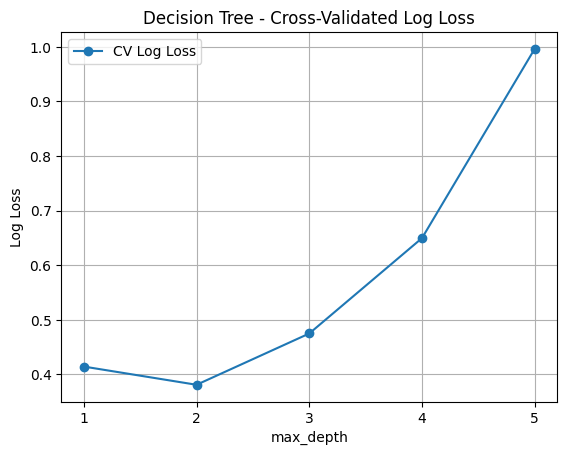


Naive Bayes
var_smoothing = 1e-08 -> Log Loss: 0.6623
var_smoothing = 1e-07 -> Log Loss: 0.6618
var_smoothing = 1e-06 -> Log Loss: 0.6569
var_smoothing = 1e-05 -> Log Loss: 0.6279
var_smoothing = 0.0001 -> Log Loss: 0.6713


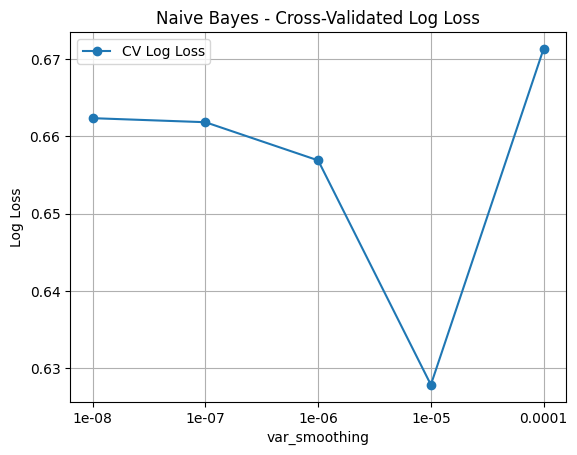


Logistic Regression
C = 0.01 -> Log Loss: 0.4939
C = 0.1 -> Log Loss: 0.3845
C = 1 -> Log Loss: 0.3712
C = 10 -> Log Loss: 0.3710
C = 20 -> Log Loss: 0.3710


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

C = 40 -> Log Loss: 0.3709
C = 60 -> Log Loss: 0.3710


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

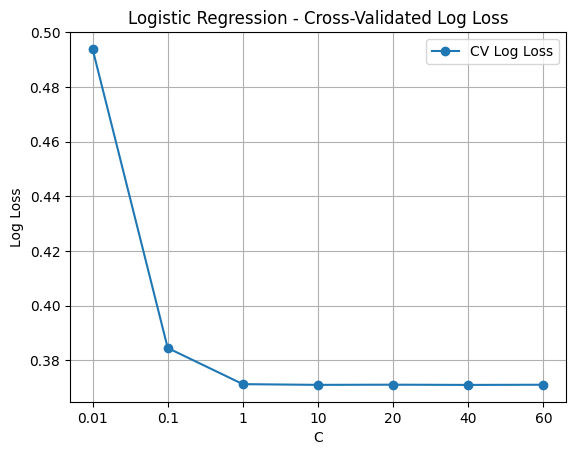


k-NN
n_neighbors = 1 -> Log Loss: 9.3283
n_neighbors = 3 -> Log Loss: 3.0004
n_neighbors = 5 -> Log Loss: 1.9541
n_neighbors = 10 -> Log Loss: 1.3246
n_neighbors = 13 -> Log Loss: 1.0476
n_neighbors = 15 -> Log Loss: 1.0045
n_neighbors = 17 -> Log Loss: 0.9859


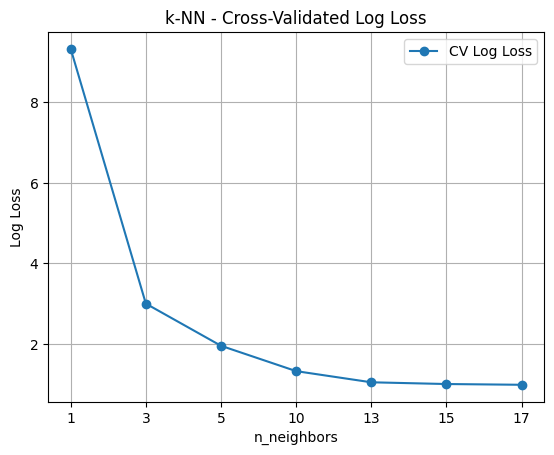

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grids = {
    'Decision Tree': {
        'model': DecisionTreeClassifier,
        'params': {'max_depth': [1, 2, 3, 4, 5]}
    },
    'Naive Bayes': {
        'model': GaussianNB,
        'params': {'var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}  
    },
    'Logistic Regression': {
        'model': LogisticRegression,
        'params': {'C': [0.01, 0.1, 1, 10, 20, 40, 60], 'max_iter': [10000]}  
    },
    'k-NN': {
        'model': KNeighborsClassifier,
        'params': {'n_neighbors': [1, 3, 5, 10, 13, 15, 17]}
    }
}

for name, clf_info in param_grids.items():
    model_class = clf_info['model']
    param_grid = clf_info['params']
    
    print(f"\n{name}")
    
    val_losses = []
    param_labels = []
    
    param_name = list(param_grid.keys())[0] if param_grid else None
    param_values = list(param_grid.values())[0] if param_grid else [None]

    for value in param_values:
        params = {param_name: value} if param_name else {}
        clf = model_class(**params)
        
        y_val_prob = cross_val_predict(clf, X_all, y_all, cv=cv, method='predict_proba')
        
        loss = log_loss(y_all, y_val_prob)
        val_losses.append(loss)
        param_labels.append(str(value))
        
        print(f"{param_name} = {value} -> Log Loss: {loss:.4f}")
    
    plt.figure()
    plt.plot(param_labels, val_losses, marker='o', label='CV Log Loss')
    plt.xlabel(param_name)
    plt.ylabel('Log Loss')
    plt.title(f'{name} - Cross-Validated Log Loss')
    plt.grid(True)
    plt.legend()
    plt.show()


decisiom tree depth = 2 

regression C = 1

naive bais C = 10e-5

knn k = 13


--- Decision Tree ---
Accuracy: 0.8530
Precision: 0.8183
Recall: 0.7845
F1: 0.8009
Roc_auc: 0.8702


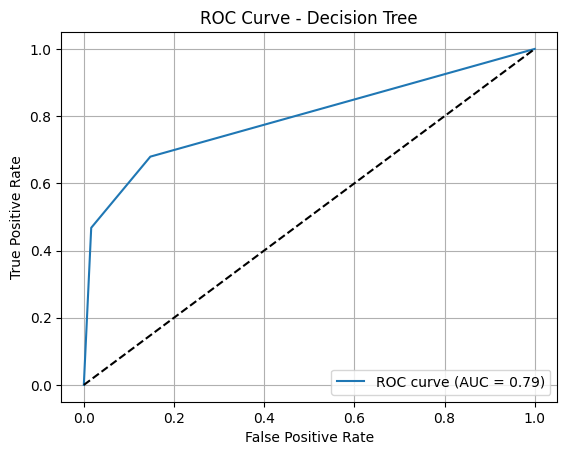


--- Naive Bayes ---
Accuracy: 0.7297
Precision: 0.7712
Recall: 0.4025
F1: 0.5284
Roc_auc: 0.8462


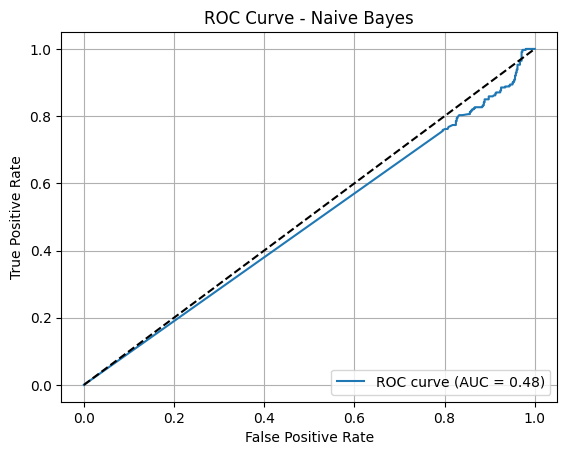


--- Logistic Regression ---
Accuracy: 0.8522
Precision: 0.8293
Recall: 0.7662
F1: 0.7963
Roc_auc: 0.8962


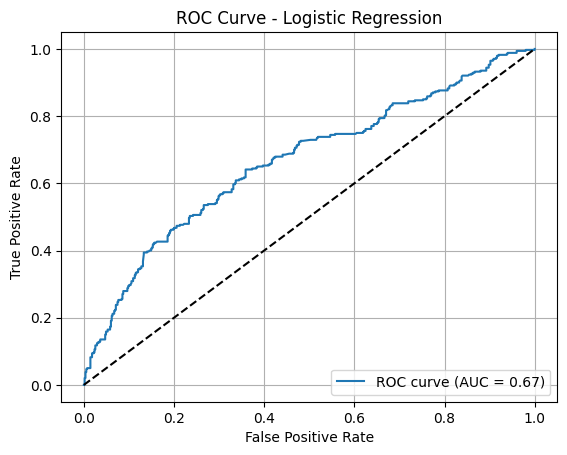


--- k-NN ---
Accuracy: 0.7665
Precision: 0.6974
Recall: 0.6708
F1: 0.6832
Roc_auc: 0.8311


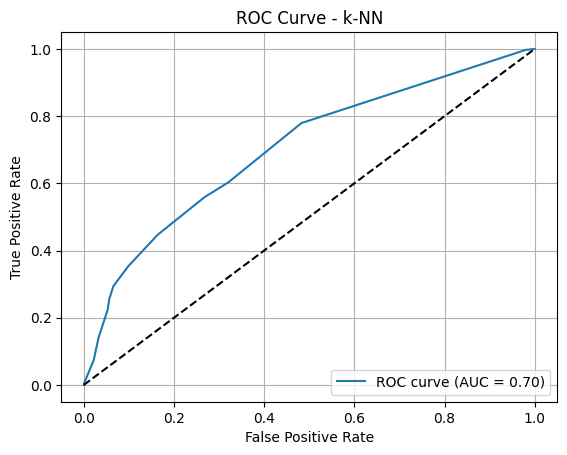

In [706]:
from sklearn.model_selection import cross_validate
classifiers = {
    'Decision Tree': DecisionTreeClassifier(max_depth=2),
    'Naive Bayes': GaussianNB(var_smoothing = 10e-5),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1),
    'k-NN': KNeighborsClassifier(n_neighbors=13)
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

for name, clf in classifiers.items():
    print(f"\n--- {name} ---")
    
    cv_results = cross_validate(clf, X_all, y_all, cv=5, scoring=scoring, return_estimator=True, return_train_score=True)

    for metric in scoring:
        mean_score = np.mean(cv_results[f'test_{metric}'])
        print(f"{metric.capitalize()}: {mean_score:.4f}")
        # mean_train_score = np.mean(cv_results[f'train_{metric}'])
        # print(f"Mean train {metric}: {mean_train_score:.4f}")

    estimator = cv_results['estimator'][0] 
    y_proba = estimator.predict_proba(X_train)[:, 1] if hasattr(estimator, 'predict_proba') else estimator.predict(X_all)
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_train, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show() 

نتایج برای 3 مدلی که خوب بودند کمی بد شد و دلیل آن دقت بیشتر در بدست اوردن دقت و تست روی کل دیتاست است

دلیل دیگر میتواند راحت تر بودن دیتای تست باشد

نتیجه برای مدل اخر بهتر شد و باتوجه به مقدار F1 مدل از مقدار شانسی حدس زدنش کم شده

در این حالت naive bais تقریبا داره شانسی عمل میکنه با توحه به مقدار auc و چون مقدار پرسیژن از ریکال خیلی بیشتره احتمالا بیشتریارو ذاره مثبت حدس میزنه و شانسی دارهه درست درمیاد

# bagging for knn

In [ ]:
from sklearn.ensemble import BaggingClassifier

ks = [1, 3, 5, 7, 9, 11, 13, 15, 17]
for k in ks : 
    model = KNeighborsClassifier(n_neighbors=k)
    bagging_model = BaggingClassifier(
        estimator=model,
        n_estimators=8,           
        bootstrap=True,            
        random_state=42
    )

    bagging_model.fit(X_train, y_train)

    y_pred = bagging_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"KNN with k = {k} Accuracy: ", accuracy)

KNN with k = 1 Accuracy:  0.6394230769230769
KNN with k = 3 Accuracy:  0.6201923076923077
KNN with k = 5 Accuracy:  0.6346153846153846
KNN with k = 7 Accuracy:  0.6346153846153846
KNN with k = 9 Accuracy:  0.625
KNN with k = 11 Accuracy:  0.6490384615384616
KNN with k = 13 Accuracy:  0.6394230769230769
KNN with k = 15 Accuracy:  0.6346153846153846
KNN with k = 17 Accuracy:  0.6394230769230769


# bagging for naive bais

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define the base estimator
model2 = GaussianNB()

# Define the bagging classifier
bagging_model = BaggingClassifier(
    estimator=model2,
    n_estimators=8,
    bootstrap=True,
    random_state=42
)

# Fit the model
bagging_model.fit(X_train, y_train)

# Predict on validation set
y_pred = bagging_model.predict(X_val)

# Compute and print accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Naive Bayes Bagging Accuracy: {accuracy:.4f}")

Naive Bayes Bagging Accuracy: 0.8990


درصد نیو بیز از 84 بع 90 درصد رسید

از بگینگ کمک گرفتیم به این صورت که چند مدل رئی داده های مختلف ردیم و با کمک همشون پیشبینی کردیم و باعث شد واریانس کمتر شه و اورفیت نشه

In [707]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks = [1, 3, 5, 7, 9, 11, 13, 15, 17]

boosting_model = GradientBoostingClassifier(
    n_estimators=8,
    random_state=42
)

boosting_model.fit(X_train, y_train)

X_train_boosted = boosting_model.predict_proba(X_train)[:, 1].reshape(-1, 1)
X_val_boosted = boosting_model.predict_proba(X_val)[:, 1].reshape(-1, 1)

for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(X_train_boosted, y_train)
    
    y_pred = knn_model.predict(X_val_boosted)
    
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Gradient Boosting Accuracy: {accuracy:.4f}")

Gradient Boosting Accuracy: 0.8365
Gradient Boosting Accuracy: 0.7788
Gradient Boosting Accuracy: 0.9567
Gradient Boosting Accuracy: 0.8654
Gradient Boosting Accuracy: 0.8654
Gradient Boosting Accuracy: 0.8654
Gradient Boosting Accuracy: 0.8654
Gradient Boosting Accuracy: 0.8654
Gradient Boosting Accuracy: 0.8654


boosting for decition tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for depth in max_depths:
    boosting_model = GradientBoostingClassifier(
        n_estimators=8,
        max_depth=depth,
        random_state=42
    )
    
    boosting_model.fit(X_train, y_train)
    
    y_pred = boosting_model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Gradient Boosting (max_depth = {depth}) Accuracy: {accuracy:.4f}")

Gradient Boosting (max_depth = 1) Accuracy: 1.0000
Gradient Boosting (max_depth = 2) Accuracy: 0.8173
Gradient Boosting (max_depth = 3) Accuracy: 0.8702
Gradient Boosting (max_depth = 4) Accuracy: 0.9038
Gradient Boosting (max_depth = 5) Accuracy: 0.8510
Gradient Boosting (max_depth = 6) Accuracy: 0.8702
Gradient Boosting (max_depth = 7) Accuracy: 0.8750
Gradient Boosting (max_depth = 8) Accuracy: 0.8413
Gradient Boosting (max_depth = 9) Accuracy: 0.8413


accuracy 100% with depth = 1

testing on test dataset

In [ ]:
boosting_model = GradientBoostingClassifier(
        n_estimators=8,
        max_depth=1,
        random_state=42
)
    
boosting_model.fit(X_train, y_train)
    
y_pred = boosting_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting (max_depth = 1) Accuracy: {accuracy:.4f}")

Gradient Boosting (max_depth = 9) Accuracy: 1.0000


دسیژن تری از 94 درضد به 100 درصد رسید

در این الگوریتم تلاش شد نمونه هایی مه نتیجه غلظ میگیرند رو وزن بیشتری بهشون بدیم تا بهتر یادبگیره و نتیجه داد

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    eval_metric='logloss',  
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")


XGBoost Accuracy: 0.8990
